# **Random Forest**

In [1]:
# Data Manipulation
import pandas as pd
from sklearn.datasets import load_wine

# Data split
from sklearn.model_selection import train_test_split

# Model
from sklearn.ensemble import RandomForestClassifier

# Visualize Tree
from sklearn.tree import export_graphviz

## Load Dataset

In [2]:
# Load dataset
df = load_wine()

In [3]:
# variables
X = pd.DataFrame(df.data, columns=df.feature_names)

# target
y = df.target

In [4]:
# Split train and test 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=12)

In [5]:
# Check shapes after split
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(160, 13) (18, 13) (160,) (18,)


In [6]:
pd.DataFrame(y).value_counts(normalize=True)

1    0.398876
0    0.331461
2    0.269663
dtype: float64

# Modeling

## Max Features

1.0


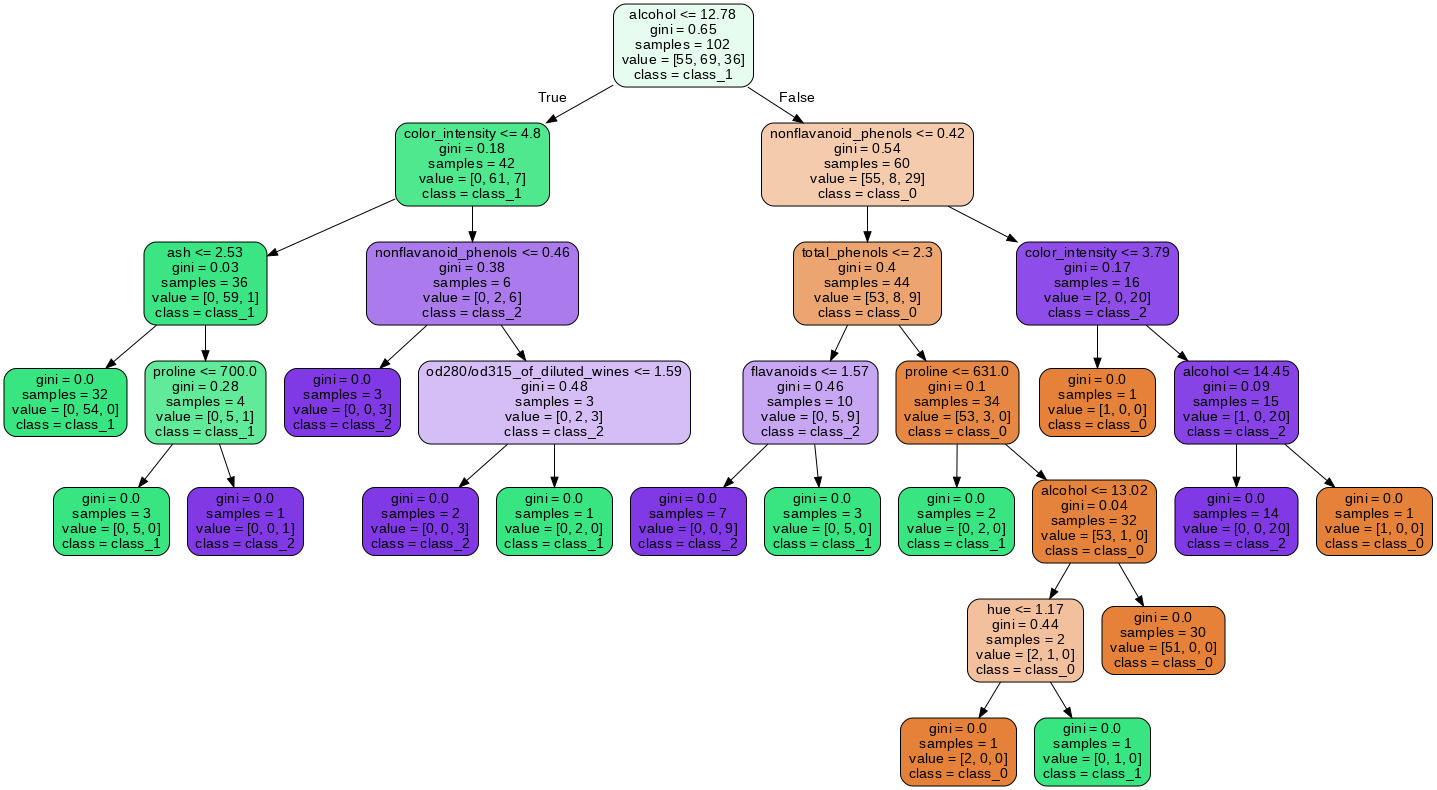

In [68]:
# Instantiate class
rf = RandomForestClassifier(max_features=0.15, random_state=2)

# Fit the model
rf.fit(X_train,y_train)

print(rf.score(X_test, y_test))

tree = rf.estimators_[99]

# Export as dot file
export_graphviz(tree, 
                out_file='tree.dot', 
                feature_names = df.feature_names,
                class_names = df.target_names,
                rounded = True, proportion = False, 
                precision = 2, filled = True)

# Convert to png using system command (requires Graphviz)
from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=72'])


# Display in jupyter notebook
from IPython.display import Image
Image(filename = 'tree.png')

* Larger numbers = more variance, less bias.
* Lower numbers =  less variance, more bias

## Max Depth

0.9444444444444444


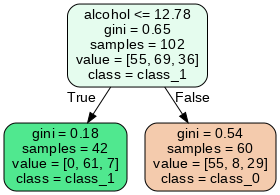

In [79]:
# Instantiate class
rf = RandomForestClassifier(max_depth=1, random_state=2)

# Fit the model
rf.fit(X_train,y_train)

print(rf.score(X_test, y_test))

tree = rf.estimators_[99]

# Export as dot file
export_graphviz(tree, 
                out_file='tree.dot', 
                feature_names = df.feature_names,
                class_names = df.target_names,
                rounded = True, proportion = False, 
                precision = 2, filled = True)

# Convert to png using system command (requires Graphviz)
from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=72'])


# Display in jupyter notebook
from IPython.display import Image
Image(filename = 'tree.png')

In [80]:
y_hat = rf.predict(X_test)
y_hat

array([2, 2, 1, 0, 1, 2, 0, 2, 1, 2, 2, 2, 1, 2, 2, 0, 0, 0])

Limit how much the tree can grow. Don't have too much influence in the result as there are 100 different trees. See that even with the depth limited to 1, it still predicted the three classes.

Minimum Samples split

0.9444444444444444


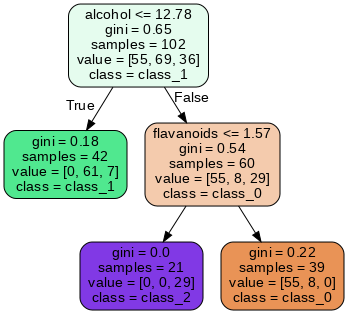

In [63]:
# Instantiate class
rf = RandomForestClassifier(min_samples_split=50, random_state=2)

# Fit the model
rf.fit(X_train,y_train)

print(rf.score(X_test, y_test))

tree = rf.estimators_[99]

# Export as dot file
export_graphviz(tree, 
                out_file='tree.dot', 
                feature_names = df.feature_names,
                class_names = df.target_names,
                rounded = True, proportion = False, 
                precision = 2, filled = True)

# Convert to png using system command (requires Graphviz)
from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=72'])


# Display in jupyter notebook
from IPython.display import Image
Image(filename = 'tree.png')

Limit how much tree will grow. Pruning too.

## Max Leaf Nodes

0.9444444444444444


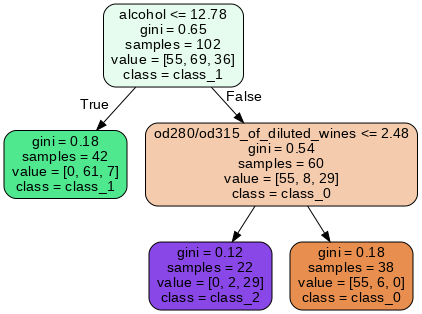

In [64]:
# Instantiate class
rf = RandomForestClassifier(max_leaf_nodes=3, random_state=2)

# Fit the model
rf.fit(X_train,y_train)

print(rf.score(X_test, y_test))

tree = rf.estimators_[99]

# Export as dot file
export_graphviz(tree, 
                out_file='tree.dot', 
                feature_names = df.feature_names,
                class_names = df.target_names,
                rounded = True, proportion = False, 
                precision = 2, filled = True)

# Convert to png using system command (requires Graphviz)
from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=72'])


# Display in jupyter notebook
from IPython.display import Image
Image(filename = 'tree.png')

How many leaves we will have at the end of the tree. Another puning tool.

## Minimum Samples per Leaf

0.6111111111111112


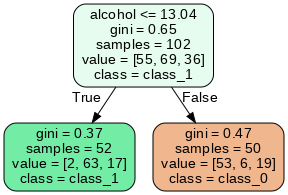

In [84]:
# Instantiate class
rf = RandomForestClassifier(min_samples_leaf=50, random_state=2)

# Fit the model
rf.fit(X_train,y_train)

print(rf.score(X_test, y_test))

tree = rf.estimators_[99]

# Export as dot file
export_graphviz(tree, 
                out_file='tree.dot', 
                feature_names = df.feature_names,
                class_names = df.target_names,
                rounded = True, proportion = False, 
                precision = 2, filled = True)

# Convert to png using system command (requires Graphviz)
from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=72'])


# Display in jupyter notebook
from IPython.display import Image
Image(filename = 'tree.png')

Limit size of the tree as well. Can be used combined with max depth.

## Complexity Cost

0.8888888888888888


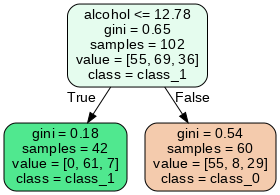

In [77]:
# Instantiate class
rf = RandomForestClassifier(ccp_alpha=0.25, random_state=2)

# Fit the model
rf.fit(X_train,y_train)

print(rf.score(X_test, y_test))

tree = rf.estimators_[99]

# Export as dot file
export_graphviz(tree, 
                out_file='tree.dot', 
                feature_names = df.feature_names,
                class_names = df.target_names,
                rounded = True, proportion = False, 
                precision = 2, filled = True)

# Convert to png using system command (requires Graphviz)
from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=72'])


# Display in jupyter notebook
from IPython.display import Image
Image(filename = 'tree.png')

Prune the tree based on the calculation of complexity cost.

See the post related to this content at [Medium, here.](https://gustavorsantos.medium.com/understanding-random-forests-hyperparameters-with-images-9b53fce32cb3)